### se importan las librerias necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# se cargan las hojas de excel

In [3]:
totales_accesos_tecnologia = pd.read_excel('../data/Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
accesos_tecnologia = pd.read_excel('../data/Internet.xlsx', sheet_name='Accesos Por Tecnología')
totales_accesos_velocidad = pd.read_excel('../data/Internet.xlsx', sheet_name='Totales Accesos por velocidad')
accesos_velocidad = pd.read_excel('../data/Internet.xlsx', sheet_name='Accesos por velocidad')
penetracion_totales = pd.read_excel('../data/Internet.xlsx', sheet_name='Penetracion-totales')
penetracion_poblacion = pd.read_excel('../data/Internet.xlsx', sheet_name='Penetración-poblacion')
penetracion_hogares = pd.read_excel('../data/Internet.xlsx', sheet_name='Penetracion-hogares')

# se realiza el ETL

In [4]:
totales_accesos_tecnologia.drop(columns= 'Periodo', inplace= True)
#la columna no es nesesaria ya que año y trimestre cumplen su misma funcion
accesos_tecnologia.drop([960, 961], inplace= True) # las columnas no tienen datos
accesos_tecnologia['Año'] = accesos_tecnologia['Año'].apply(lambda x:x[:4] if type(x) == str else x)
accesos_tecnologia['Trimestre'] = accesos_tecnologia['Trimestre'].apply(lambda x:x[:1] if type(x) == str else x)
#totales_accesos_velocidad no nesesita ninguna transformacion
accesos_velocidad['OTROS'] = accesos_velocidad['OTROS'].apply(abs)
# hay un valor negativo lo cual es imposible en este contexto por lo que se usa la funcion de valor absoluto
#la columna no es nesesaria ya que año y trimestre cumplen su misma funcion
penetracion_totales = penetracion_totales.drop(columns='Periodo')
#penetracion_poblacion no nesesita ninguna transformacion
#penetracion_hogares no nesesita ninguna transformacion

# Se realiza el EDA

### Comprobamos si hay duplicados

In [5]:
print(totales_accesos_tecnologia[totales_accesos_tecnologia.duplicated()].shape[0])
print(accesos_tecnologia[accesos_tecnologia.duplicated()].shape[0])
print(totales_accesos_velocidad[totales_accesos_velocidad.duplicated()].shape[0])
print(accesos_velocidad[accesos_velocidad.duplicated()].shape[0])
print(penetracion_totales[penetracion_totales.duplicated()].shape[0])
print(penetracion_poblacion[penetracion_poblacion.duplicated()].shape[0])
print(penetracion_hogares[penetracion_hogares.duplicated()].shape[0])

0
0
0
0
0
0
0


no hay duplicados

### comprobamos si hay valores faltantes

In [6]:
print(totales_accesos_tecnologia.isna().sum().sum())
print(accesos_tecnologia.isna().sum().sum())
print(totales_accesos_velocidad.isna().sum().sum())
print(accesos_velocidad.isna().sum().sum())
print(penetracion_totales.isna().sum().sum())
print(penetracion_poblacion.isna().sum().sum())
print(penetracion_hogares.isna().sum().sum())

0
0
0
6
0
0
0


hay 6 valores faltantes en accesos velocidad<br>
se debe comprobar si se pueden rellenar

In [7]:
print(accesos_velocidad[accesos_velocidad.isna().any(axis=1)])
# al realizar la sumatoria los valores dan exactamente lo mismo que el total por lo cual se rellena con 0
accesos_velocidad = accesos_velocidad.fillna(0)

      Año  Trimestre         Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
433  2019          2   Capital Federal            74.0               1027.0   
443  2019          2          La Rioja             9.0                 11.0   
444  2019          2           Mendoza            20.0               2522.0   
451  2019          2        Santa Cruz            25.0                 84.0   
454  2019          2  Tierra Del Fuego             6.0                123.0   
455  2019          2           Tucumán            16.0                157.0   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
433           281370.0            124087.0             239691.0   
443            39819.0              4297.0               4857.0   
444           205165.0              2971.0              10092.0   
451            24861.0              3806.0               1202.0   
454            41824.0              4241.0               1573.0   
455            78891.0             44296.0  

### comprobamos si hay outlayers

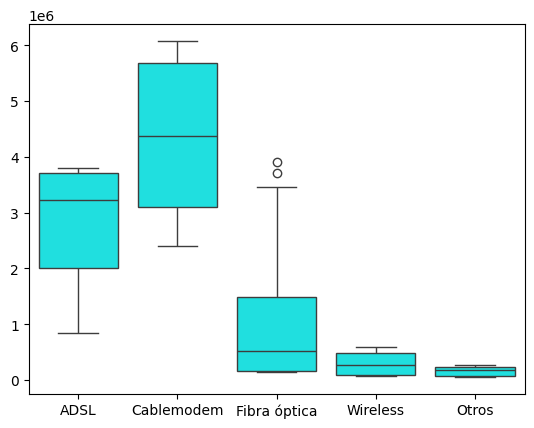

In [8]:
sns.boxplot(totales_accesos_tecnologia.drop(columns=['Año', 'Trimestre', 'Total']), color= 'cyan')
plt.show()

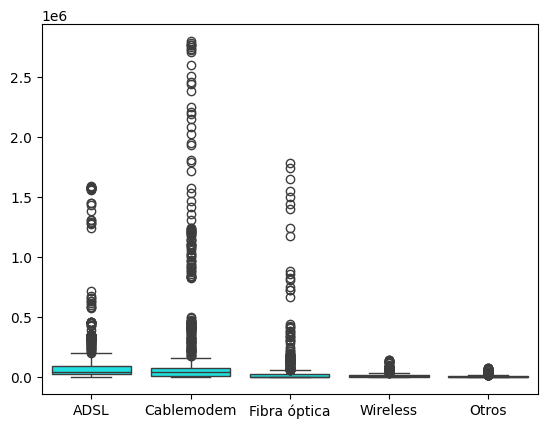

In [9]:
sns.boxplot(accesos_tecnologia.drop(columns=['Año', 'Trimestre', 'Total']), color= 'cyan')
plt.show()

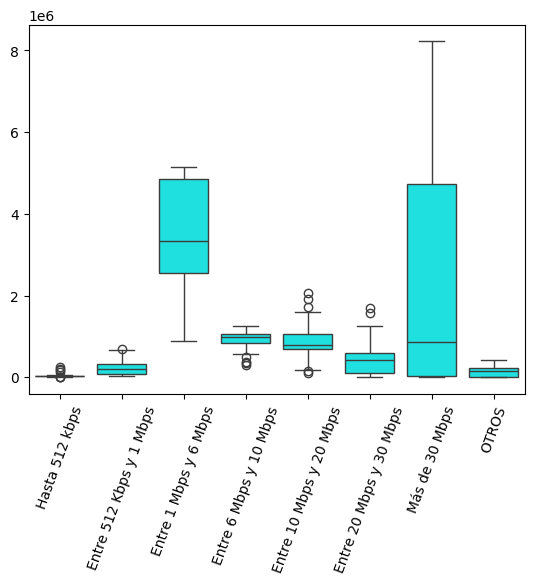

In [18]:
plt.xticks(rotation= 70)
sns.boxplot(totales_accesos_velocidad.drop(columns=['Año', 'Trimestre', 'Total']), color= 'cyan')
plt.show()

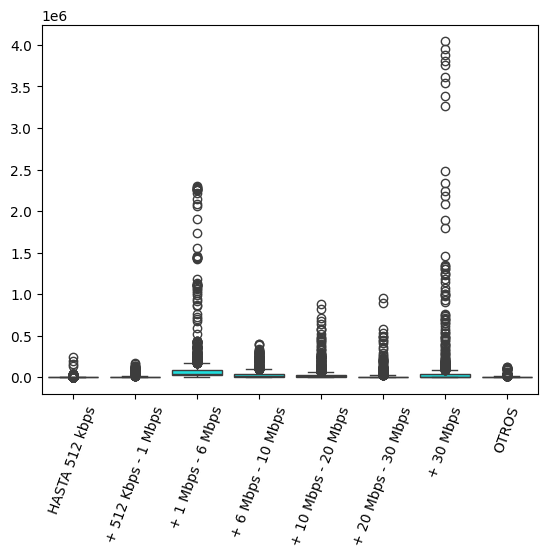

In [17]:
plt.xticks(rotation= 70)
sns.boxplot(accesos_velocidad.drop(columns=['Año', 'Trimestre', 'Total']), color= 'cyan')
plt.show()

<Axes: >

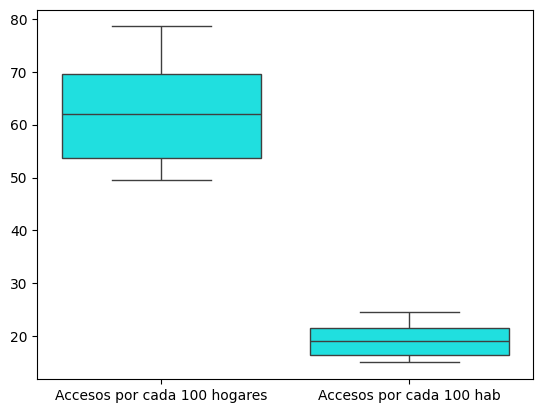

In [13]:
sns.boxplot(penetracion_totales.drop(columns=['Año', 'Trimestre']), color='cyan')

<Axes: >

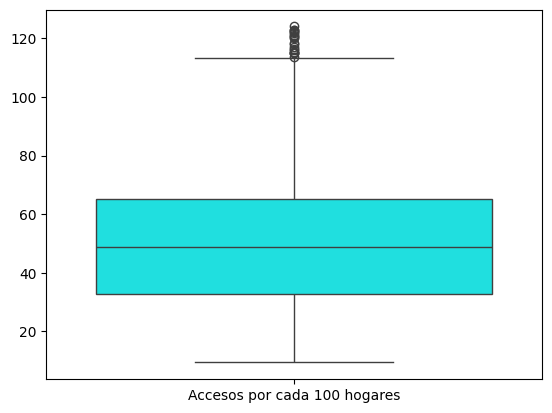

In [14]:
sns.boxplot(penetracion_hogares.drop(columns=['Año', 'Trimestre']), color='cyan')

<Axes: >

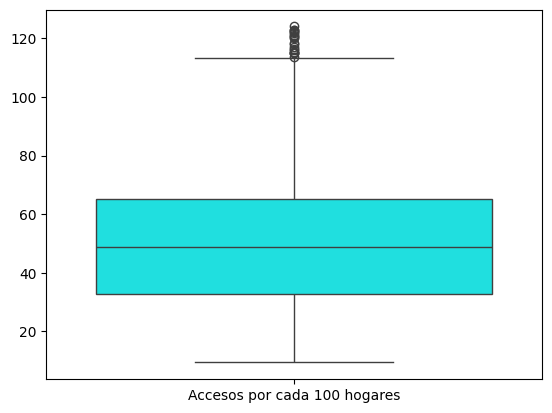

In [19]:
sns.boxplot(penetracion_hogares.drop(columns=['Año', 'Trimestre']), color='cyan')

podemos ver que hay una gran cantidad de outliers en accesos_velocidad y accesos_tecnologia pero pocos en sus respectivos totales por lo que seria pertinente realizar un analisis mas exaustivo